#### Problem Statement

An ecommerce company has prepared a dataset containing shopping details of their
customers, which includes CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100).
The company is unable to target a specific set of customers with a particular set of SKUs

Segment customers into different groups based on their shopping trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:\\Users\\himan\\OneDrive\\Desktop\\csv\\Machine Learning\\shopping_data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Display basic information and statistical summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


### Agglomerative Clustering

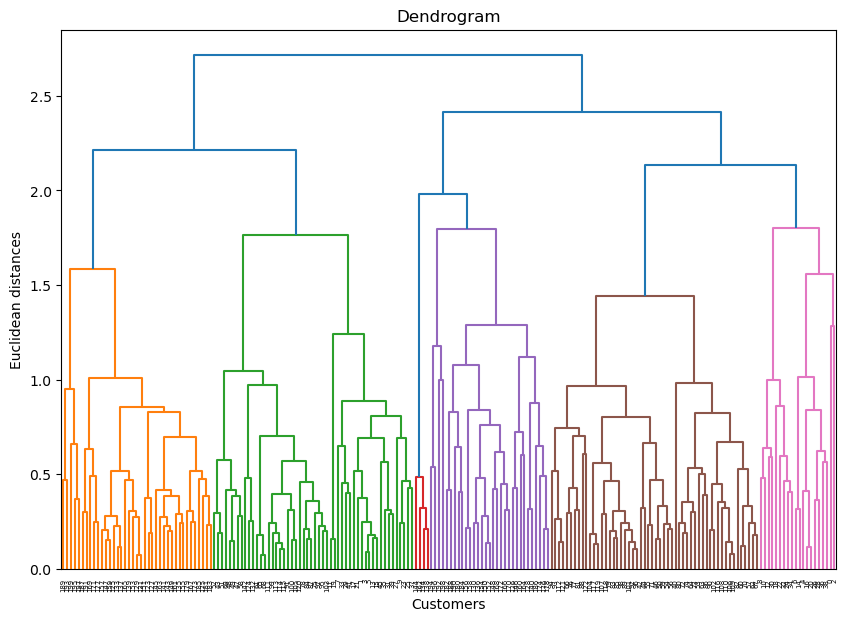

In [5]:
# Visualize the Dendrogram to show the hierarchical clustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Deciding the Optimal Number of Clusters

### Dendrogram Analysis

A dendrogram is a tree-like diagram that records the sequences of merges or splits. To decide the optimal number of clusters:

- Plot the dendrogram.
- Look for the longest vertical distance that doesn't cross any horizontal line (also known as the largest gap between two successive merges).
- The optimal number of clusters corresponds to the number of vertical lines that intersect a horizontal line drawn through this longest vertical distance.

In [6]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
agg_clusters = agg_cluster.fit_predict(scaled_features)

# Add the Agglomerative Clustering labels to the dataset
data['Agg_Cluster'] = agg_clusters

**Visualizing the clusters using features of the dataset**

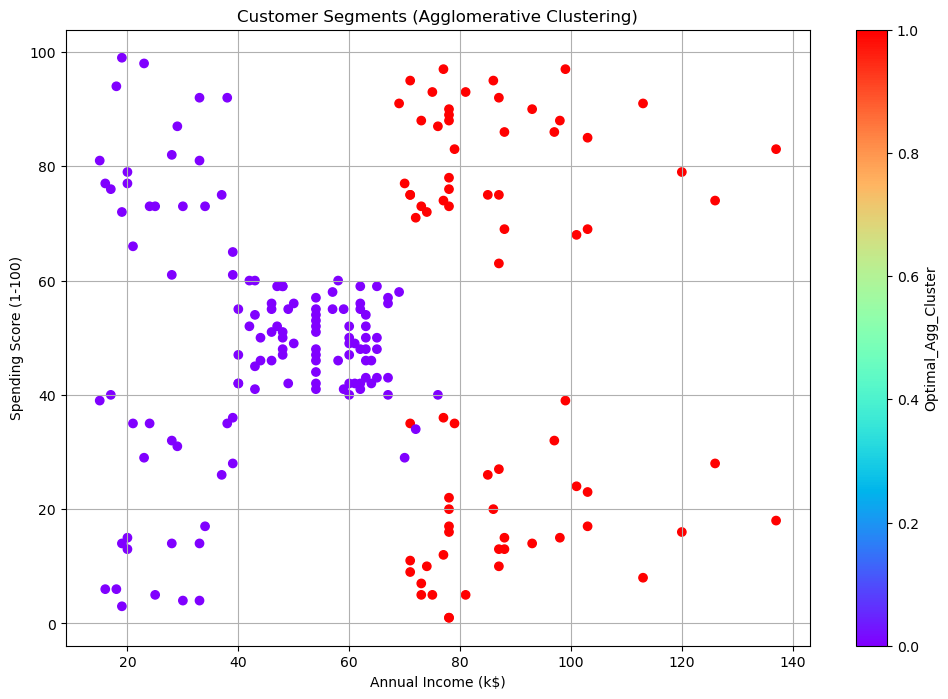

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Agg_Cluster'], cmap='rainbow', marker='o')
plt.title('Customer Segments (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Optimal_Agg_Cluster')
plt.grid(True)
plt.show()

### Silhouette Analysis
The Silhouette Score is a metric used to evaluate the quality of a clustering algorithm's results. <br>
**It measures how similar an object is to its own cluster compared to other clusters.** <br>
The score ranges from -1 to 1, 
- A score close to +1 indicates that the clusters are well-separated and each data point is very close to its own cluster's centroid, indicating good clustering.
- A score close to 0 indicates overlapping clusters or that data points are on the boundary between clusters.
- A score close to -1 indicates that data points may have been assigned to the wrong clusters.

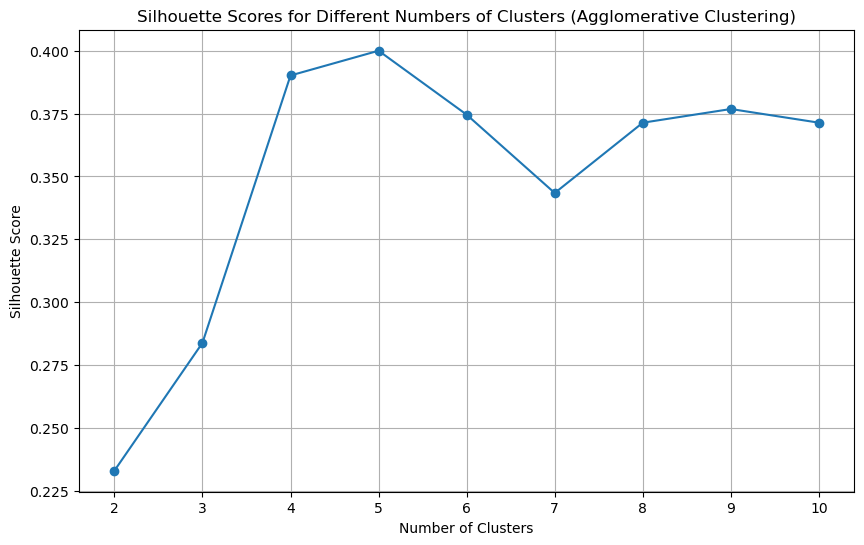

The optimal number of clusters are 5


In [8]:
# Compute silhouette scores for a range of cluster numbers
from sklearn.metrics import silhouette_score
silhouette_scores = []
range_n_clusters = range(2, 11)  # Testing from 2 to 10 clusters

for n_clusters in range_n_clusters:
    agg_cluster_test = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='complete')
    cluster_labels = agg_cluster_test.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Identify the number of clusters with the highest silhouette score
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters are {optimal_clusters}")


**Let us use 5 clusters**

In [9]:
agg_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
agg_clusters = agg_cluster.fit_predict(scaled_features)

# Add the Agglomerative Clustering labels to the dataset
data['Agg_Cluster'] = agg_clusters

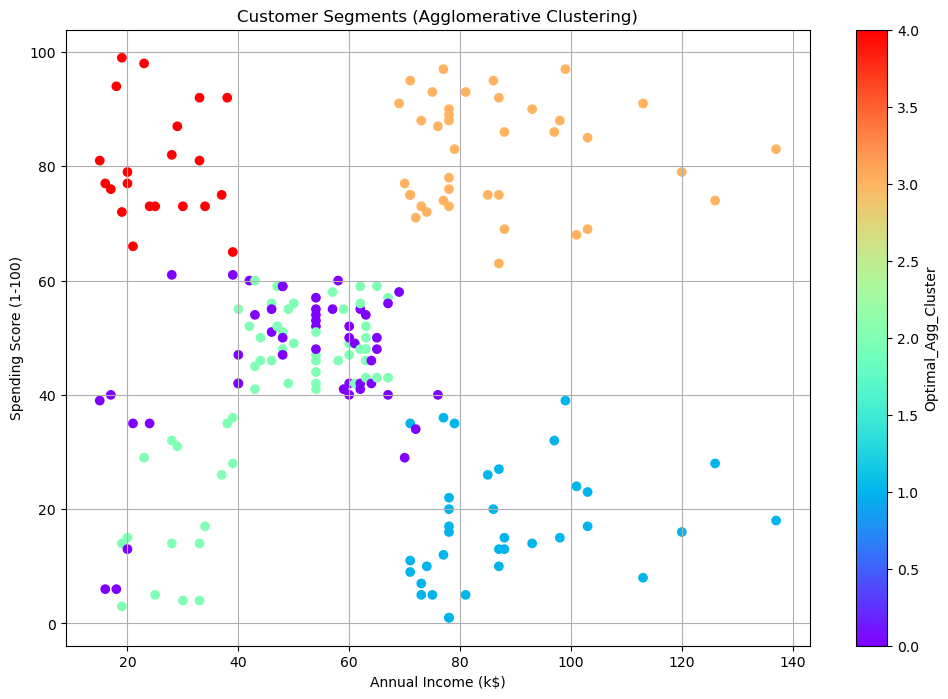

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Agg_Cluster'], cmap='rainbow', marker='o')
plt.title('Customer Segments (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Optimal_Agg_Cluster')
plt.grid(True)
plt.show()

## Cluster Analysis

Cluster 0 (Purple)

- Annual Income: Low to moderate (20k to 60k)
- Spending Score: Moderate (40 to 60)
- Characteristics: Customers in this cluster have moderate spending habits and a wide range of incomes. They may respond well to moderate discounts and mid-range products.

Cluster 1 (Light Blue)

- Annual Income: High (60k to 140k)
- Spending Score: Low (1 to 40)
- Characteristics: High-income customers with low spending scores. They might be high earners but conservative spenders. Marketing strategies could focus on highlighting value and premium product features to encourage spending.

Cluster 2 (Cyan)

- Annual Income: Low to moderate (20k to 70k)
- Spending Score: Low (1 to 40)
- Characteristics: Low-income customers with low spending scores. These customers might be price-sensitive and looking for budget-friendly options. Discount offers and promotions could be effective.

Cluster 3 (Orange)

- Annual Income: High (60k to 140k)
- Spending Score: High (60 to 100)
- Characteristics: High-income and high-spending customers. These are potentially the most valuable customers, likely to respond well to premium products, exclusive offers, and personalized services.

Cluster 4 (Red)

- Annual Income: Low to moderate (20k to 40k)
- Spending Score: High (60 to 100)
- Characteristics: Low-income customers with high spending scores. These customers prioritize spending on certain products despite having lower incomes. They might appreciate value-for-money deals.

### Elbow Method

Elbow Method is generally used for K-means Clustering

C:\Users\himan\OneDrive\Documents\Custom Office Templates\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\OneDrive\Documents\Custom Office Templates\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\himan\OneDrive\Documents\Custom Office Templates\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\h

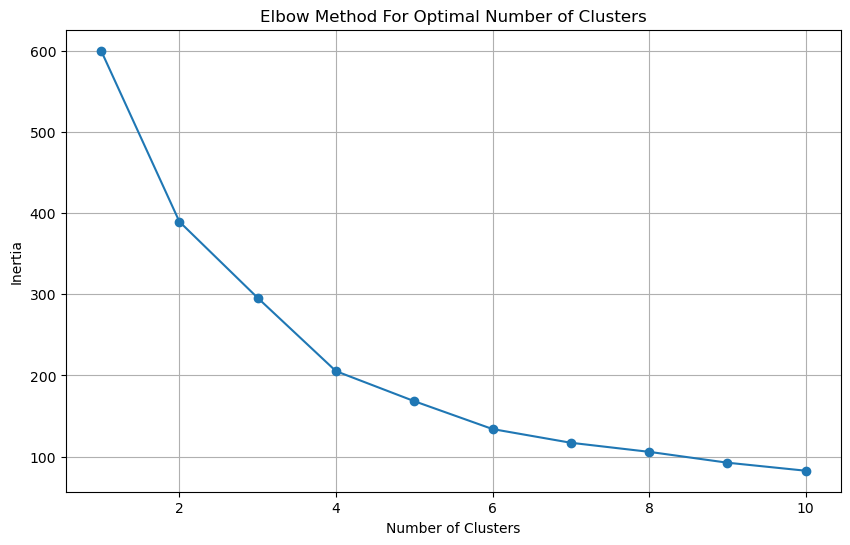

In [11]:
# Determine the optimal number of clusters using the Elbow method

from sklearn.cluster import KMeans

# inertia means  WCSS(Within-Cluster Sum of Squares) 
inertia = []  # This list will store the WCSS for each value of k
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
# n_init is a parameter that controls the number of times the KMeans algorithm is run with different initial centroid seeds.
    kmeans = KMeans(n_clusters=n_clusters,n_init=10)  
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
